# Analyzing Bay Wheels December 2019 Data
## by Ibrahim Olayiwola

## Introduction

>Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

The data used for this analysis is that of **December 2019** and it can be found [here](https://s3.amazonaws.com/baywheels-data/index.html).

### Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('201912-baywheels-tripdata.csv')
df.head()

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,37.772000,-122.389970,349.0,Howard St at Mary St,37.781010,-122.405666,12085,Customer,NaN
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,410.0,Illinois St at Cesar Chavez St,37.750200,-122.386567,9477,Customer,NaN
2,8164,2019-12-31 23:50:04.8770,2020-01-01 02:06:09.4140,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,10420,Customer,NaN
3,8163,2019-12-31 23:49:21.4000,2020-01-01 02:05:24.6670,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2065,Customer,NaN
4,6847,2019-12-31 22:51:05.6850,2020-01-01 00:45:13.4860,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,10219,Customer,NaN


In [3]:
# Shape of dataset
df.shape

(150102, 14)

### Structure of dataset.
>The dataset consist of 150102 rows and 14 columns.
>- **duration_sec**: This is the trip duration in seconds.
- **start_time**: This column tells us the start time and date of the trip.
- **end_time**: This is the end time and date of the trip.
- **start_station_id**: The identification number of the station the trip was started.
- **end_station_id**: The identification number of the station the trip ended.
- **start_station_name**: The name of the station the trip was started.
- **end_station_name**: The name of the station the trip ended.
- **start_station_latitude and start_station_longitude**: Address of the start station on a GPS.
- **end_station_latitude and end_station_longitude**: Address of the end station on a GPS.
- **Bike_id**: Identification number of the bike.
- **User_type**: A user's status (Either a subcriber or a customer).
- **rental_access_method**: The menthod a user used in renting a bike. No information of this column was given on the website where this dataset was gotten.

### Assessing Data

#### Visual Assessment
>This dataset was also assessed using Google Sheets.


In [4]:
# Viewing random sample of the dataset
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
141617,339,2019-12-26 18:12:06,2019-12-26 18:17:45,NaN,NaN,37.773258,-122.439178,NaN,NaN,37.776642,-122.446191,359051,Subscriber,app
129462,404,2019-12-05 12:44:04,2019-12-05 12:50:49,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,NaN,NaN,37.332264,-121.912673,310402,Subscriber,app
3316,323,2019-12-30 16:07:15.5700,2019-12-30 16:12:38.7190,66.0,3rd St at Townsend St,37.778742,-122.392741,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,9999,Customer,NaN
95224,789,2019-12-06 09:14:34.0440,2019-12-06 09:27:43.6820,66.0,3rd St at Townsend St,37.778742,-122.392741,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,1502,Subscriber,NaN
49630,715,2019-12-15 12:40:51.2420,2019-12-15 12:52:46.8320,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,13072,Customer,NaN
64766,845,2019-12-12 09:31:14.1730,2019-12-12 09:45:20.1450,355.0,23rd St at Tennessee St,37.755367,-122.388795,482.0,Brannan St at 7th St,37.772658,-122.403681,12014,Subscriber,NaN
136022,721,2019-12-17 21:22:57,2019-12-17 21:34:59,NaN,NaN,37.359045,-121.885551,NaN,NaN,37.359460,-121.884822,259346,Customer,clipper
123762,2450,2019-12-30 15:16:02,2019-12-30 15:56:53,NaN,NaN,37.321168,-121.914836,NaN,NaN,37.321176,-121.914821,909493,Subscriber,app
5657,1784,2019-12-28 18:55:39.2530,2019-12-28 19:25:23.3260,155.0,Emeryville Public Market,37.840521,-122.293528,155.0,Emeryville Public Market,37.840521,-122.293528,266,Customer,NaN
135245,286,2019-12-21 23:31:56,2019-12-21 23:36:42,NaN,NaN,37.346234,-121.914619,NaN,NaN,37.346806,-121.906609,522735,Subscriber,clipper


### Programmatic Assessment


In [5]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             150102 non-null  int64  
 1   start_time               150102 non-null  object 
 2   end_time                 150102 non-null  object 
 3   start_station_id         129083 non-null  float64
 4   start_station_name       129087 non-null  object 
 5   start_station_latitude   150102 non-null  float64
 6   start_station_longitude  150102 non-null  float64
 7   end_station_id           128755 non-null  float64
 8   end_station_name         128757 non-null  object 
 9   end_station_latitude     150102 non-null  float64
 10  end_station_longitude    150102 non-null  float64
 11  bike_id                  150102 non-null  int64  
 12  user_type                150102 non-null  object 
 13  rental_access_method     27681 non-null   object 
dtypes: f

In [6]:
# Number of unique bike ids
df.bike_id.nunique()

5905

In [7]:
# Numberof unique start stations
df.start_station_name.nunique()

422

In [8]:
# Number of unique end stations
df.end_station_name.nunique()

425

In [9]:
# Descriptive measures of center on trip duration
df.duration_sec.describe()

count    150102.000000
mean        790.649752
std        2925.944647
min          60.000000
25%         359.000000
50%         570.000000
75%         886.000000
max      912110.000000
Name: duration_sec, dtype: float64

In [10]:
# Unique modes of bike rental access
df.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [11]:
# Unique user types
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

>From the cells above, we can see that there are some improvements that can be done to the dataset. Some of the improvements includes

>- Change the datatypes of some columns (start_time, end_station_id, end_station_latitude, bike_id etc)
- Extract the days and hours from start_time and end_time columns
- Calculate minutes from duration_sec column

### Cleaning Data

In [12]:
# Copying dataset to preserve original data
df_copy = df.copy()
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,37.772000,-122.389970,349.0,Howard St at Mary St,37.78101,-122.405666,12085,Customer,NaN
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,410.0,Illinois St at Cesar Chavez St,37.75020,-122.386567,9477,Customer,NaN


In [13]:
# drop latitudes and longitudes columns and rental_access_method column.
df_copy = df.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                   'end_station_longitude', 'rental_access_method'], axis=1)
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,349.0,Howard St at Mary St,12085,Customer
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38.0,The Embarcadero at Pier 38,410.0,Illinois St at Cesar Chavez St,9477,Customer


**Define**

>1. start_time data type is object. | Change to timestamps.
2. end_time has a data type of object. | Change to timestamps.
3. start_station_id data type is float. | Change to object.
4. end_station_id data type is float. | Change to object.
5. bike_id is of data type int. | Change to object.
6. user_type is object. | Change to category.

**Code**

In [14]:
# Change dates to timestamps
df_copy.start_time = pd.to_datetime(df_copy.start_time)
df_copy.end_time = pd.to_datetime(df_copy.end_time)

In [15]:
# Change start_station_id, end_station_id and bike_id to object
df_copy.bike_id = df_copy.bike_id.astype(str)
df_copy.start_station_id = df_copy.start_station_id.astype(str)
df_copy.end_station_id = df_copy.end_station_id.astype(str)

In [16]:
# Change user_type to category
df_copy.user_type = df_copy.user_type.astype('category')

**Test**

In [17]:
# Test by checking datatypes of columns
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        150102 non-null  int64         
 1   start_time          150102 non-null  datetime64[ns]
 2   end_time            150102 non-null  datetime64[ns]
 3   start_station_id    150102 non-null  object        
 4   start_station_name  129087 non-null  object        
 5   end_station_id      150102 non-null  object        
 6   end_station_name    128757 non-null  object        
 7   bike_id             150102 non-null  object        
 8   user_type           150102 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(1), object(5)
memory usage: 9.3+ MB


**Define**

>Extract the days, hours from start_time and end_time columns and calculate minutes from duration_sec column

In [18]:
# extract start time weekdays
df_copy['start_time_day'] = df_copy['start_time'].dt.strftime('%a')

In [19]:
# extract start time hour
df_copy['start_time_hour'] = df_copy['start_time'].dt.hour

In [20]:
# extract end time weekdays
df_copy['end_time_day'] = df_copy['end_time'].dt.strftime('%a')

In [21]:
# extract end time hour
df_copy['end_time_hour'] = df_copy['end_time'].dt.hour

In [22]:
# extract start date
df_copy['start_date'] = df_copy['start_time'].dt.day

In [23]:
# Calculate duration time in minute
df_copy['duration_min'] = df_copy['duration_sec'] / 60

**Test**

In [24]:
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,start_time_day,start_time_hour,end_time_day,end_time_hour,start_date,duration_min
0,66600,2019-12-31 14:28:50.286,2020-01-01 08:58:51.250,364.0,China Basin St at 3rd St,349.0,Howard St at Mary St,12085,Customer,Tue,14,Wed,8,31,1110.000000
1,36526,2019-12-31 21:52:47.762,2020-01-01 08:01:33.932,38.0,The Embarcadero at Pier 38,410.0,Illinois St at Cesar Chavez St,9477,Customer,Tue,21,Wed,8,31,608.766667


In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        150102 non-null  int64         
 1   start_time          150102 non-null  datetime64[ns]
 2   end_time            150102 non-null  datetime64[ns]
 3   start_station_id    150102 non-null  object        
 4   start_station_name  129087 non-null  object        
 5   end_station_id      150102 non-null  object        
 6   end_station_name    128757 non-null  object        
 7   bike_id             150102 non-null  object        
 8   user_type           150102 non-null  category      
 9   start_time_day      150102 non-null  object        
 10  start_time_hour     150102 non-null  int64         
 11  end_time_day        150102 non-null  object        
 12  end_time_hour       150102 non-null  int64         
 13  start_date          150102 no

### Main feature(s) of interest.

>The main features I'm interested in is the time most trips are taken. The days of the week and how factors like the duration of the trip, user type, affect the the time.

### Features in the dataset tht will help support investigation into feature(s) of interest.

>The features in the dataset that will help support my investigation includes the start_time weekday, duration and user_type columns.

## Univariate Exploration.
>In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

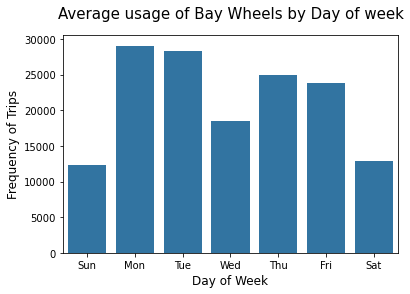

In [26]:
# Daily useage of the bike sharing system

days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
base_color = sb.color_palette()[0]
g = sb.countplot(data=df_copy, x='start_time_day', color = base_color, order = days)
plt.title("Average usage of Bay Wheels by Day of week", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Day of Week', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Frequency of Trips', y=0.5, fontsize=12, fontweight='medium');

>From the above, it can be seen that most trips are taken on Mondays and Tuesdays and the least trips are taken on Saturdays and Sundays. This might be because the Moday and Tuesday begins the work day while people stay more at home on weekends.

>Next, I will check the hours in which trips are taken to get an idea of the peak hours.

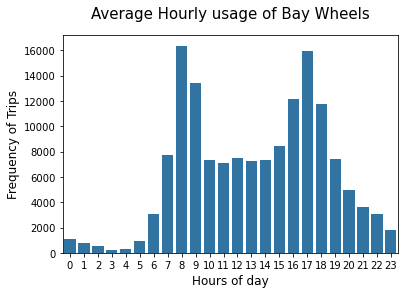

In [27]:
# Hourly usage of the bike system
base_color = sb.color_palette()[0]
g = sb.countplot(data=df_copy, x='start_time_hour', color = base_color)
plt.title("Average Hourly usage of Bay Wheels", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Hours of day', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Frequency of Trips', y=0.5, fontsize=12, fontweight='medium');

>The chart above is bimodal, the time peaks at 08:00hrs and at 17:00hrs. This might also be related to work because most workers go to work around 8am and leave work around 5pm. It is also interesting that the hours between 10am and 2pm seems constant.

>**Next, I will investigate the trip duration distribution. The trip duration time is measured in minutes.**

In [28]:
# Describe duration_min 
df_copy.duration_min.describe()

count    150102.000000
mean         13.177496
std          48.765744
min           1.000000
25%           5.983333
50%           9.500000
75%          14.766667
max       15201.833333
Name: duration_min, dtype: float64

>There seem to be an outlier as the median is 9.5 and the max value is greater than 15000. I'll remove the outlier

In [29]:
# change datatype to integer
df_copy.duration_min = df_copy.duration_min.astype(int)

In [30]:
# view data which duration is 15201
df_copy.query('duration_min == 15201')

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,start_time_day,start_time_hour,end_time_day,end_time_hour,start_date,duration_min
124395,912110,2019-12-19 23:15:36,2019-12-30 12:37:26,nan,NaN,nan,NaN,614329,Customer,Thu,23,Mon,12,19,15201


In [31]:
# remove data 124395
df_copy = df_copy.query('duration_min != 15201')

# check that the data has been removed
df_copy.query('duration_min == 15201')

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,start_time_day,start_time_hour,end_time_day,end_time_hour,start_date,duration_min


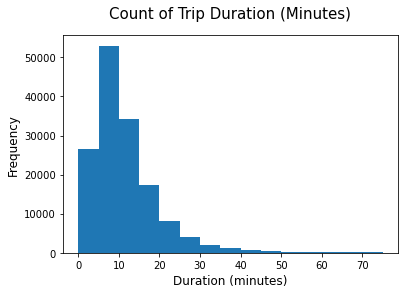

In [32]:
# Distribution of duration time.
bin_edges = np.arange(0, 80, 5)

plt.hist(data = df_copy, x = 'duration_min', bins = bin_edges)
plt.title("Count of Trip Duration (Minutes)", y=1.05, fontsize=15, fontweight='medium')
plt.xlabel('Duration (minutes)', y=1.05, fontsize=12, fontweight='medium' );
plt.ylabel('Frequency', y=0.5, fontsize=12, fontweight='medium');

>The chart above tells us that most trips take between 1 and 15 minutes. **The next investigation is to check the distribution or the percentage of users who are subscribers and who are customers.**

In [33]:
# First, we calculate the proportion of user type
customer_count = df_copy.query('user_type == "Customer"')['bike_id'].count()
subscriber_count = df_copy.query('user_type == "Subscriber"')['bike_id'].count()

customer_prop = customer_count / df_copy['bike_id'].count()
subscriber_prop = subscriber_count / df_copy['bike_id'].count()

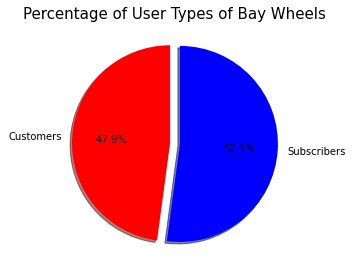

In [34]:
# plotting percentages of user types of bay wheels.
labels = ['Customers', 'Subscribers'] 
sizes = [customer_prop, subscriber_prop]
colors = ['red', 'blue']
explode = (0, 0.1) # Explode subscribers slice

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of User Types of Bay Wheels", y=1.05, fontsize=15, fontweight='medium');

plt.show()

>From the pie chart, it is revealed that 52% of users are subscribers while approximately 48% of users are customers.

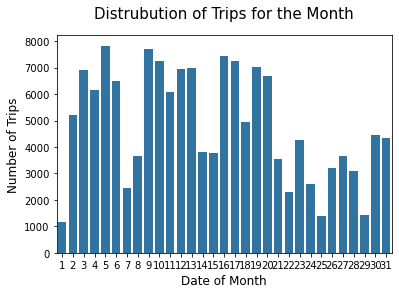

In [35]:
# plotting distribution of trips for the month
base_color = sb.color_palette()[0]
g = sb.countplot(data=df_copy, x='start_date', color = base_color)
plt.title("Distrubution of Trips for the Month", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Date of Month', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Number of Trips', y=0.5, fontsize=12, fontweight='medium');

### Discussing the Distribution(s) of variable(s) of Interest.


- The visualizations showed that weekdays are when most users use the service as more than 15000 users use it. It also showed that less than 15000 users are using bikes on weekends.
- Also, the peak time for the bikes in a day occur at 0800hrs and 1700hrs.
- Lastly, the proportion of users that are subscribers is slightly higher than that of customers.
- It also showed that the number of trips occurred from the at the beginning till around 20th of the month.
- I did not perform any transformations in the data. However, I removed an outlier in the duration time.

## Bivariate Exploration
> In this section, the relationships between pairs of variables in the data will be investigated.

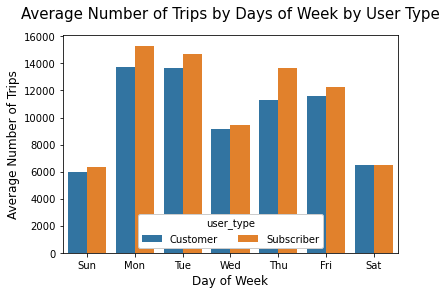

In [36]:
# Relationship between days of the week and user type
ax = sb.countplot(data = df_copy, x = 'start_time_day', hue = 'user_type', order=days);
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plt.title("Average Number of Trips by Days of Week by User Type", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Day of Week', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Average Number of Trips', y=0.5, fontsize=12, fontweight='medium');

> We can see from the chart that on average, subscribers take more trips than the customers except on Saturdays in which the subscribers and customers take roughly the same amount of trips on bikes.

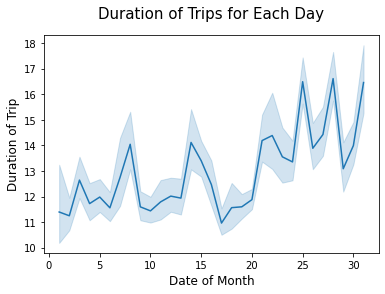

In [37]:
# distribution of trips for each day
ax = sb.lineplot(x="start_date", y="duration_min",sort=False, data=df_copy)
plt.title("Duration of Trips for Each Day", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Date of Month', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Duration of Trip', y=0.5, fontsize=12, fontweight='medium');

> The chart shows that the duration of trips increased as the month was coming to an end.



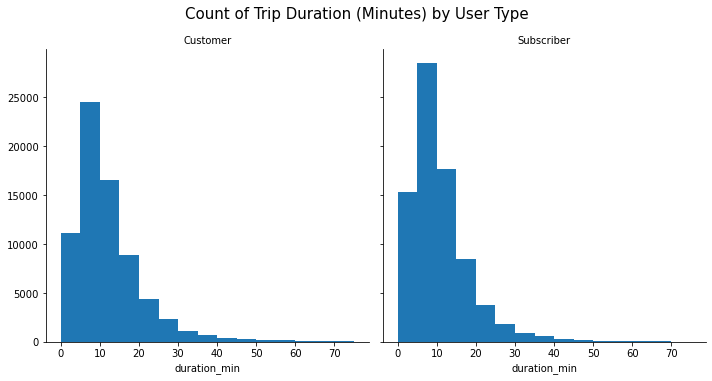

In [38]:
# Distribution of duration time.bb
g = sb.FacetGrid(df_copy, col="user_type", margin_titles=True, height=5)
bin_edges = np.arange(0, 80, 5)
g.map(plt.hist, "duration_min", color=base_color, bins=bin_edges);
g.fig.suptitle('Count of Trip Duration (Minutes) by User Type', y=1.05, fontsize=15, fontweight='medium');
g.set_titles(col_template = '{col_name}');

> The above chart shows that the duration of trips that falls between 1 and 15 minutes by the subscribers of the service is higher than that of the custsomers. However, for durations of 20 minutes and above, the user are roughly the same. On the other hand most trips taken are between 1 and 15 minutes for both subscribers and customers.

### Relationships observed in this part of the investigation and how the feature(s) of interest vary with other features in the dataset.

> There is a difference in the trip duration between customers and subscribers. Subscribers trips are usually longer than for customers, most probably due to the fact they use bike rides for work. Customers on the other hand use the system mainly for commute purposes so they rather prefer quick rides.



### Interesting relationships between the other features (not the main feature(s) of interest.

>Intrestingly, towards the end of the month, the duration of trips went higher. This might have happened because the holidays were near and maybe had vacations from work

## Multivariate Exploration.

> In this section, plots of three or more variables are used to investigate the data even further. I try to make sure the investigations are justified, and follow from work in the previous sections.

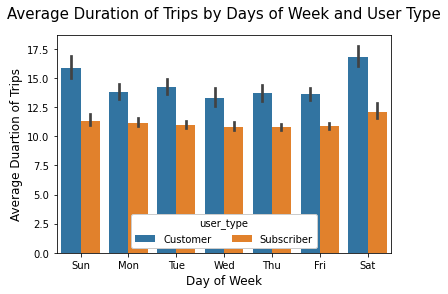

In [39]:
# Average Duration of Trips by Days of Week and User Type
ax = sb.barplot(data = df_copy, x = 'start_time_day', y = 'duration_min', hue = 'user_type', order = days);
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type');
plt.title("Average Duration of Trips by Days of Week and User Type", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Day of Week', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Average Duartion of Trips', y=0.5, fontsize=12, fontweight='medium');

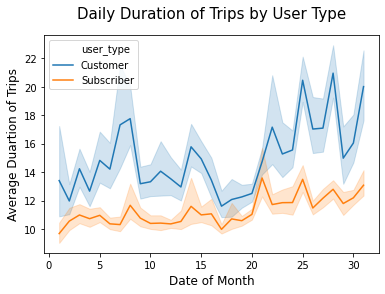

In [40]:
# Daily Duration of Trips by User Type
ax = sb.lineplot(x='start_date', y='duration_min',
                  hue="user_type", data=df_copy)
plt.title("Daily Duration of Trips by User Type", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Date of Month', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Average Duartion of Trips', y=0.5, fontsize=12, fontweight='medium');

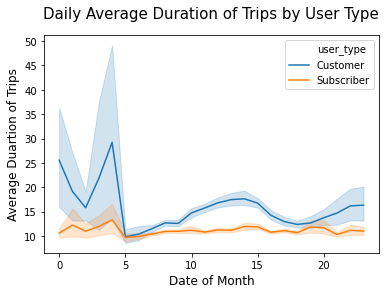

In [41]:
# Daily Average Duration of Trips by User Type
ax = sb.lineplot(x='start_time_hour', y='duration_min',
                  hue="user_type", data=df_copy)
plt.title("Daily Average Duration of Trips by User Type", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Date of Month', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Average Duartion of Trips', y=0.5, fontsize=12, fontweight='medium');

### Some Observed Relationships in the Multivariate Exploration of the Dataset.

>- The time most trip were taken was towards the end of the month and the customers were those that spent more time using Bay wheels services.
- Also, on comparing the average duration of trips by days of the week taken by users, the weekends were the time most trips were taken.

### Surprising Interactions between Features.

> On comparing the average duration of trips and not the count of the duration, we see that the customers spend more time than the subscribers. From the bivariate plots where the count of duration was plotted against the user type, the subscribers seemed to spend more time on the bikes.


### Suggestion on Further Investigations.
> The average trip duration of Customers is more than that of Subscribers.
- Why would be such a pattern?
- Shouldn't it make more sense that Subscribers utilize their subscriptions to the fullest and have longer rides on average? Or 


In [42]:
# Saving df_copy to csv
df_copy.to_csv('df_master.csv',index=False)